IMPORTING LIBRARIES:

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [33]:
#Load the dataset
dataset = pd.read_csv("dataset.csv")

In [34]:
#Handle missing values
imputer = SimpleImputer(strategy='mean')
dataset_filled = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)

In [35]:
X = dataset_filled.drop('Label', axis=1)
y = dataset_filled['Label']

In [36]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Define Predicting function
def predict_foot_deformity(point_states):
    # Convert point_states to integers
    point_states = [int(state) for state in point_states]
    
    # Count the number of unpressed point
    unpressed_point = sum(point_states)
    
    # Check if any unpressed point are present
    if unpressed_point > 0:
        print("Foot deformity detected! Non-detected points:", unpressed_point)
    else:
        print("No foot deformity detected.")


LOGISTIC REGRESSION

In [38]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [40]:
test_data = pd.read_csv('data.csv')
imputer = SimpleImputer(strategy='mean')
test_data_imputed = pd.DataFrame(imputer.fit_transform(test_data), columns=test_data.columns)

In [41]:
y_pred_test = model1.predict(test_data_imputed)
print("Predicted Labels:", y_pred_test)

Predicted Labels: [1.]


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Logistic Regression
y_pred_lr = model1.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_score_lr = f1_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_lr)
print("Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_score_lr)
print("Confusion Matrix:")
print(conf_matrix_lr)
print("AUC Score:", auc_lr)
print("\n")

Logistic Regression:
Accuracy: 0.8
Precision: 0.8
Recall: 1.0
F1 Score: 0.888888888888889
Confusion Matrix:
[[ 0  3]
 [ 0 12]]
AUC Score: 0.5




In [43]:
model1 = LogisticRegression()
# Perform 5-fold cross-validation
log_cv_scores = cross_val_score(model1, X, y, cv=5, scoring='accuracy')

SUPPORT VECTOR MACHINE

In [44]:
# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
# Create a grid search object
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
# Perform grid search to find the best parameters
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [46]:
# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [47]:
# Train the Support Vector Machine (SVM) classifier
model2 = SVC(kernel='linear')  # You can change the kernel type as needed
model2.fit(X_train, y_train)

SVC(kernel='linear')

In [48]:
y_pred = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [49]:
# Predict using the trained SVM model
y_pred = model2.predict(test_data_imputed)
# Make predictions using the best estimator
y_pred = best_estimator.predict(X_test_scaled)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Best Parameters: {'C': 1, 'kernel': 'rbf'}
Accuracy: 1.0


In [50]:
test_data = pd.read_csv('data.csv')
imputer = SimpleImputer(strategy='mean')
test_data_imputed = pd.DataFrame(imputer.fit_transform(test_data), columns=test_data.columns)
y_pred_test = model2.predict(test_data_imputed)
print("Predicted Labels:", y_pred_test)

Predicted Labels: [1.]


In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
y_pred_svm = model2.predict(X_test)  # Corrected to use 'model' instead of 'model_svm'
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_pred_svm)
print("Support Vector Machine:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_score_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)
print("AUC Score:", auc_svm)

Support Vector Machine:
Accuracy: 0.8
Precision: 0.8
Recall: 1.0
F1 Score: 0.888888888888889
Confusion Matrix:
[[ 0  3]
 [ 0 12]]
AUC Score: 0.5


In [52]:
model2 = SVC()
# Perform 5-fold cross-validation
svm_cv_scores = cross_val_score(model2, X, y, cv=5, scoring='accuracy')

HIST GRADIENT BOOSTING CLASSIFIER

In [53]:
# Define parameters for HistGradientBoostingClassifier
params = {
    'learning_rate': 0.1,
    'max_iter': 100,
    'max_depth': 5,
    'min_samples_leaf': 10,
    'max_leaf_nodes': 31,
    'l2_regularization': 0.0,  # No regularization
    'early_stopping': True,
    'validation_fraction': 0.1,
    'tol': 1e-4,
    'random_state': 42
}


In [54]:
# Create and train the HistGradientBoostingClassifier
model3 = HistGradientBoostingClassifier(**params)
model3.fit(X_train, y_train)
# Make predictions
y_pred_hgbc = model3.predict(X_test)

In [55]:
# Calculate accuracy
accuracy_hgbc = accuracy_score(y_test, y_pred_hgbc)
print("Accuracy:", accuracy_hgbc)

Accuracy: 0.8


In [56]:
test_data = pd.read_csv('data.csv')
imputer = SimpleImputer(strategy='mean')
test_data_imputed = pd.DataFrame(imputer.fit_transform(test_data), columns=test_data.columns)
y_pred_test = model3.predict(test_data_imputed)
print("Predicted Labels:", y_pred_test)

Predicted Labels: [1.]


In [57]:
model3 = HistGradientBoostingClassifier()
# Perform 5-fold cross-validation
hist_cv_scores = cross_val_score(model3, X, y, cv=5, scoring='accuracy')

PREDICTION AND COMPARSION OF MODELS RESULTS

In [58]:
#Predict the output
for index, row in test_data_imputed.iterrows():
    point_states = row.tolist()  
    predict_foot_deformity(point_states)


Foot deformity detected! Non-detected points: 4


In [59]:
log_cv_scores = cross_val_score(model1, X, y, cv=5, scoring='accuracy')
svm_cv_scores = cross_val_score(model2, X, y, cv=5, scoring='accuracy')
hist_cv_scores = cross_val_score(model3, X, y, cv=5, scoring='accuracy')
mean_accuracies = [np.mean(log_cv_scores), np.mean(svm_cv_scores), np.mean(hist_cv_scores)]
models = ['Logistic Regression', 'SVM', 'HistGradientBoostingClassifier']

In [60]:
print("log_Cross-Validation Scores:", log_cv_scores)
print("SVM_Cross-Validation Scores:", svm_cv_scores)
print("hist_Cross-Validation Scores:", hist_cv_scores)

log_Cross-Validation Scores: [0.93333333 0.86666667 0.86666667 0.86666667 0.85714286]
SVM_Cross-Validation Scores: [0.93333333 0.93333333 0.86666667 1.         1.        ]
hist_Cross-Validation Scores: [0.93333333 0.73333333 0.73333333 1.         1.        ]


In [61]:
print("Mean Accuracy of Logistic Regression:", np.mean(log_cv_scores))
print("Mean Accuracy of SVM:", np.mean(svm_cv_scores))
print("Mean Accuracy of HistGradientBoostingClassifier:", np.mean(hist_cv_scores))

Mean Accuracy of Logistic Regression: 0.8780952380952382
Mean Accuracy of SVM: 0.9466666666666667
Mean Accuracy of HistGradientBoostingClassifier: 0.8800000000000001


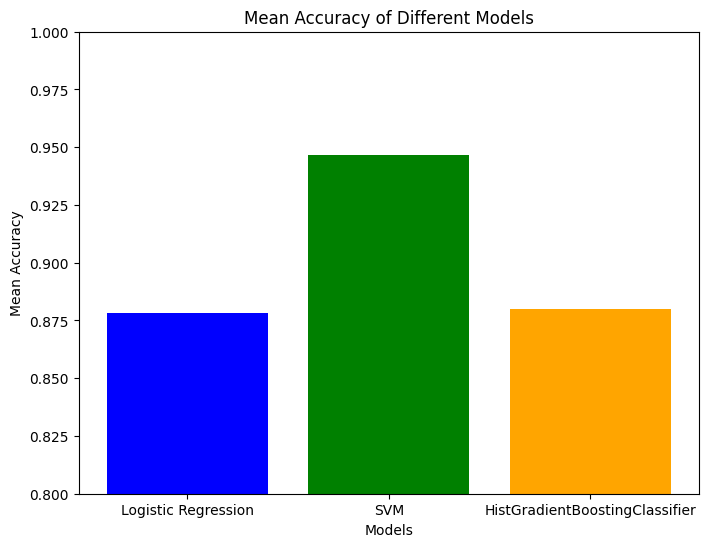

In [62]:
# Plot bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, mean_accuracies, color=['blue', 'green', 'orange'])
plt.title('Mean Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.ylim(0.8, 1.0)  # Adjust ylim if needed
plt.show()